## 5.1 The Hiring Problem

In [10]:
hiring_cost = 100
interviewing_cost = 10

10

In [57]:
function hire_assistant(n)
    best = 0
    best_perf = 0
    total_cost = 0
    ranks = collect(shuffle(1:n))
    for (i, rank) in enumerate(ranks)
        total_cost += interviewing_cost
        if rank > best_perf
            best = i
            best_perf = rank
            total_cost += hiring_cost
        end
    end
    return total_cost
end

hire_assistant (generic function with 1 method)

In [58]:
reps = 100
function avg_hire_assistant(n)
    cumsum = 0
    for r in 1:reps
        cumsum += hire_assistant(n)
    end
    return cumsum / reps
end       

avg_hire_assistant (generic function with 2 methods)

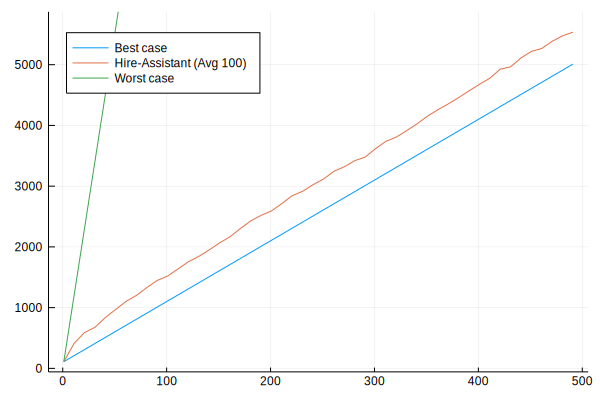

In [59]:
using Plots
xmax = 500
step = 10
plot(1:step:xmax, (1:step:xmax) .* interviewing_cost .+ hiring_cost, label="Best case")
plot!(1:step:xmax, avg_hire_assistant, label="Hire-Assistant (Avg $reps)")
plot!(1:step:xmax, (1:step:xmax) .* (interviewing_cost + hiring_cost), label="Worst case")
plot!(ylims=[interviewing_cost + hiring_cost, avg_hire_assistant(xmax)], legend=:topleft)

## 5.2 Randomized Algorithms

In [72]:
function hire_expected_best(n)
    stop = log(n)
    best = 0
    best_perf = 0
    total_cost = 0
    ranks = collect(shuffle(1:n))
    for (i, rank) in enumerate(ranks)
        if i > 1 && i > stop
            break
        end
        total_cost += interviewing_cost
        if rank > best_perf
            best = i
            best_perf = rank
            total_cost += hiring_cost
        end
    end
    return total_cost
end
reps = 100
function avg_hire_expected_best(n)
    cumsum = 0
    for r in 1:reps
        cumsum += hire_expected_best(n)
    end
    return cumsum / reps
end       

avg_hire_expected_best (generic function with 1 method)

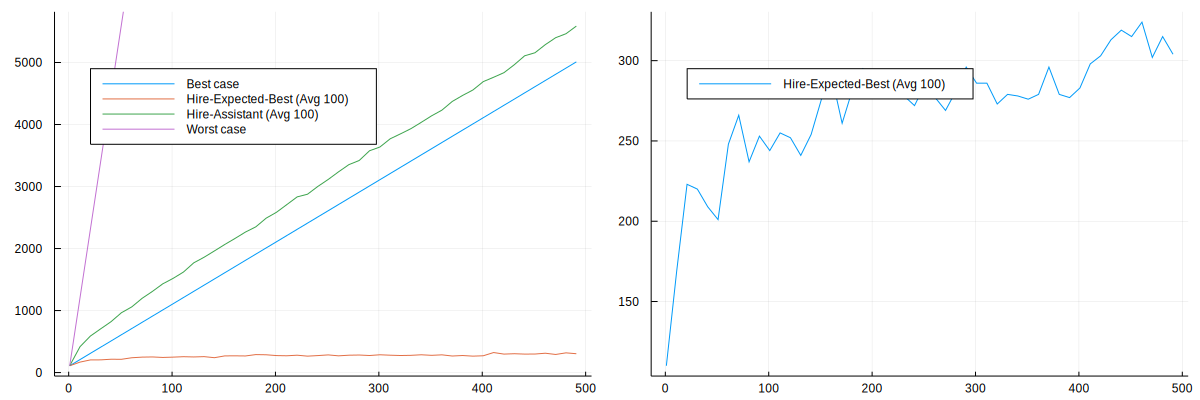

In [76]:
xmax = 500
step = 10
plot(1:step:xmax, (1:step:xmax) .* interviewing_cost .+ hiring_cost, label="Best case")
plot!(1:step:xmax, avg_hire_expected_best, label="Hire-Expected-Best (Avg $reps)")
plot!(1:step:xmax, avg_hire_assistant, label="Hire-Assistant (Avg $reps)")
plot!(1:step:xmax, (1:step:xmax) .* (interviewing_cost + hiring_cost), label="Worst case")
cost = plot!(ylims=[interviewing_cost + hiring_cost, avg_hire_assistant(xmax)], legend=:topleft)

rank_diff = plot(1:step:xmax, avg_hire_expected_best, label="Hire-Expected-Best (Avg $reps)")
rank_diff = plot!(legend=:topleft)
plot(cost, rank_diff, layout=2, size=(1200, 400))

In [96]:
function hire_once(n, min_rk)
    best_perf = 0
    total_cost = 0
    ranks = collect(shuffle(1:n))
    for (i, rank) in enumerate(ranks)
        total_cost += interviewing_cost
        if rank > best_perf
            best_perf = rank
            if i > min_rk
                total_cost += hiring_cost
                break
            end
        end
    end
    return total_cost, best_perf
end
N = 100
reps = 100
function avg_rank_hire_once(min_rk)
    cumsum = 0
    for r in 1:reps
        cost, rank = hire_once(N, min_rk)
        cumsum += rank
    end
    return cumsum / reps
end
reps = 100
function avg_cost_hire_once(min_rk)
    cumsum = 0
    for r in 1:reps
        cost, rank = hire_once(N, min_rk)
        cumsum += cost
    end
    return cumsum / reps
end

avg_cost_hire_once (generic function with 1 method)

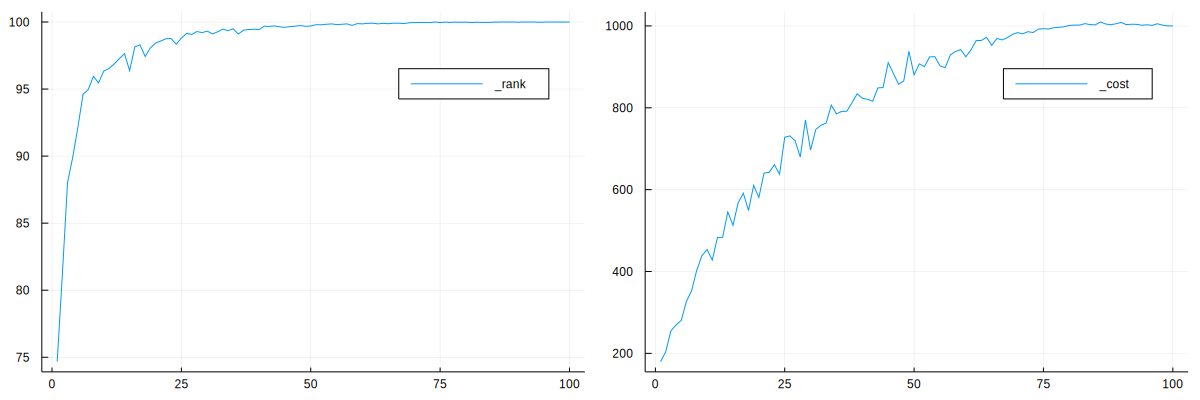

In [100]:

rk = plot(1:100, avg_rank_hire_once, label="_rank")
c = plot(1:100, avg_cost_hire_once, label="_cost")
plot(rk, c, layout=2, size = (1200, 400))